In [23]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import re
import numpy as np
import matplotlib.ticker as ticker
from wordcloud import WordCloud
from PIL import Image
%matplotlib inline

In [9]:
df = pd.read_csv("dataframe.csv")
df

,Unnamed: 0,km,year,color,test_cost,price,num_of_hand,Engine_Size,electric,disel,gasoline,automatic,manual,private,leasing,rent,else,Manufacturer,Model
0,0,4400,2021,שנהב לבן,1811,110000,2,1998.0,0,0,1,1,0,1,0,0,0,מזדה,3 COMFORT
1,1,75000,2019,כסף,1102,60000,1,1248.0,0,0,1,1,0,1,0,0,0,קיה,פיקנטו LX
2,2,46000,2021,שנהב לבן,4731,243000,1,1995.0,0,0,1,1,0,1,0,0,0,ג'יפ,רנגלר 2D SPORT S
3,3,16000,2021,שנהב לבן,1529,97000,3,998.0,0,0,1,1,0,0,1,0,0,קיה,סטוניק LX
4,4,33000,2020,שחור מטלי,4731,347000,1,1991.0,1,0,1,1,0,1,0,0,0,MG,מרצדס E קלאס E300 E A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8771,9153,28000,2019,כסוף כהה,1102,80900,1,1248.0,0,0,1,1,0,1,0,0,0,קיה,פיקנטו EX
8772,9154,150730,2016,כסף,1693,74900,2,1591.0,0,0,1,1,0,1,0,0,0,קיה,ספורטז' PREMIUM GT
8773,9157,110000,2019,שחור,2019,135744,1,1998.0,0,0,1,1,0,1,0,0,0,מזדה,CX-5 EXECUTIVE
8774,9158,135000,2018,כסף,2563,140650,4,1984.0,0,0,1,1,0,1,0,0,0,אאודי,Q3 LIMITED


In [10]:
# Transforming order in strings to represent in graphs
df['color'] = df['color'].str[::-1]
df['Manufacturer'] = df['Manufacturer'].apply(lambda x: x[::-1] if re.search(r'[\u0590-\u05FF]+', x) else x)

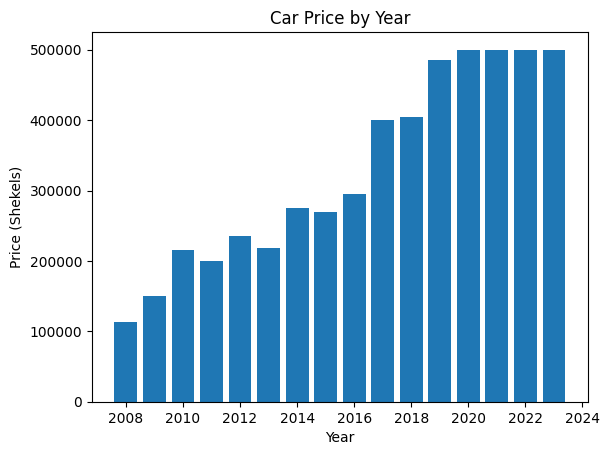

In [50]:
# Presentation of the price distribution by year of production
plt.bar(df['year'], df['price'])
plt.xlabel('Year')
plt.ylabel('Price (Shekels)')
plt.title('Car Price by Year')

plt.show()

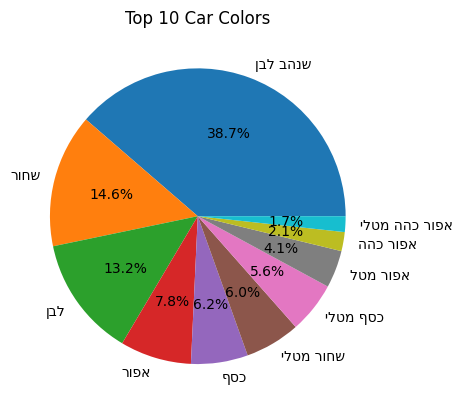

In [12]:
# Introducing the ten most common colors
color_counts = df['color'].value_counts()
top_colors = color_counts.head(10)
plt.pie(top_colors, labels=top_colors.index, autopct='%1.1f%%')
plt.title('Top 10 Car Colors')
plt.show()

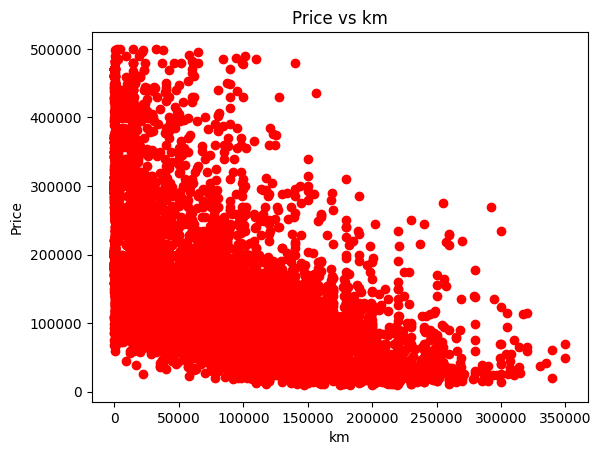

In [20]:
# Presentation of the price distribution by km
x = df['km']
y = df['price']
 
plt.scatter(x, y, color = 'red') 

plt.xlabel("km")
plt.ylabel("Price")
plt.title("Price vs km")

plt.show()

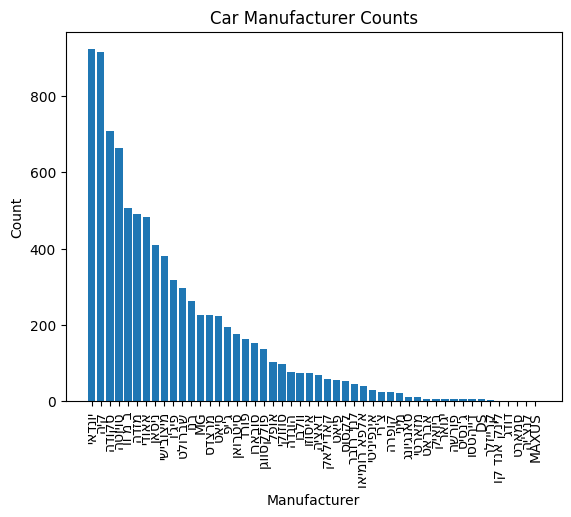

In [15]:
# Presentation of the distribution of the producers
manufacturer_counts = df['Manufacturer'].value_counts()
plt.bar(manufacturer_counts.index, manufacturer_counts)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Car Manufacturer Counts')
plt.xticks(rotation=90)
plt.show()

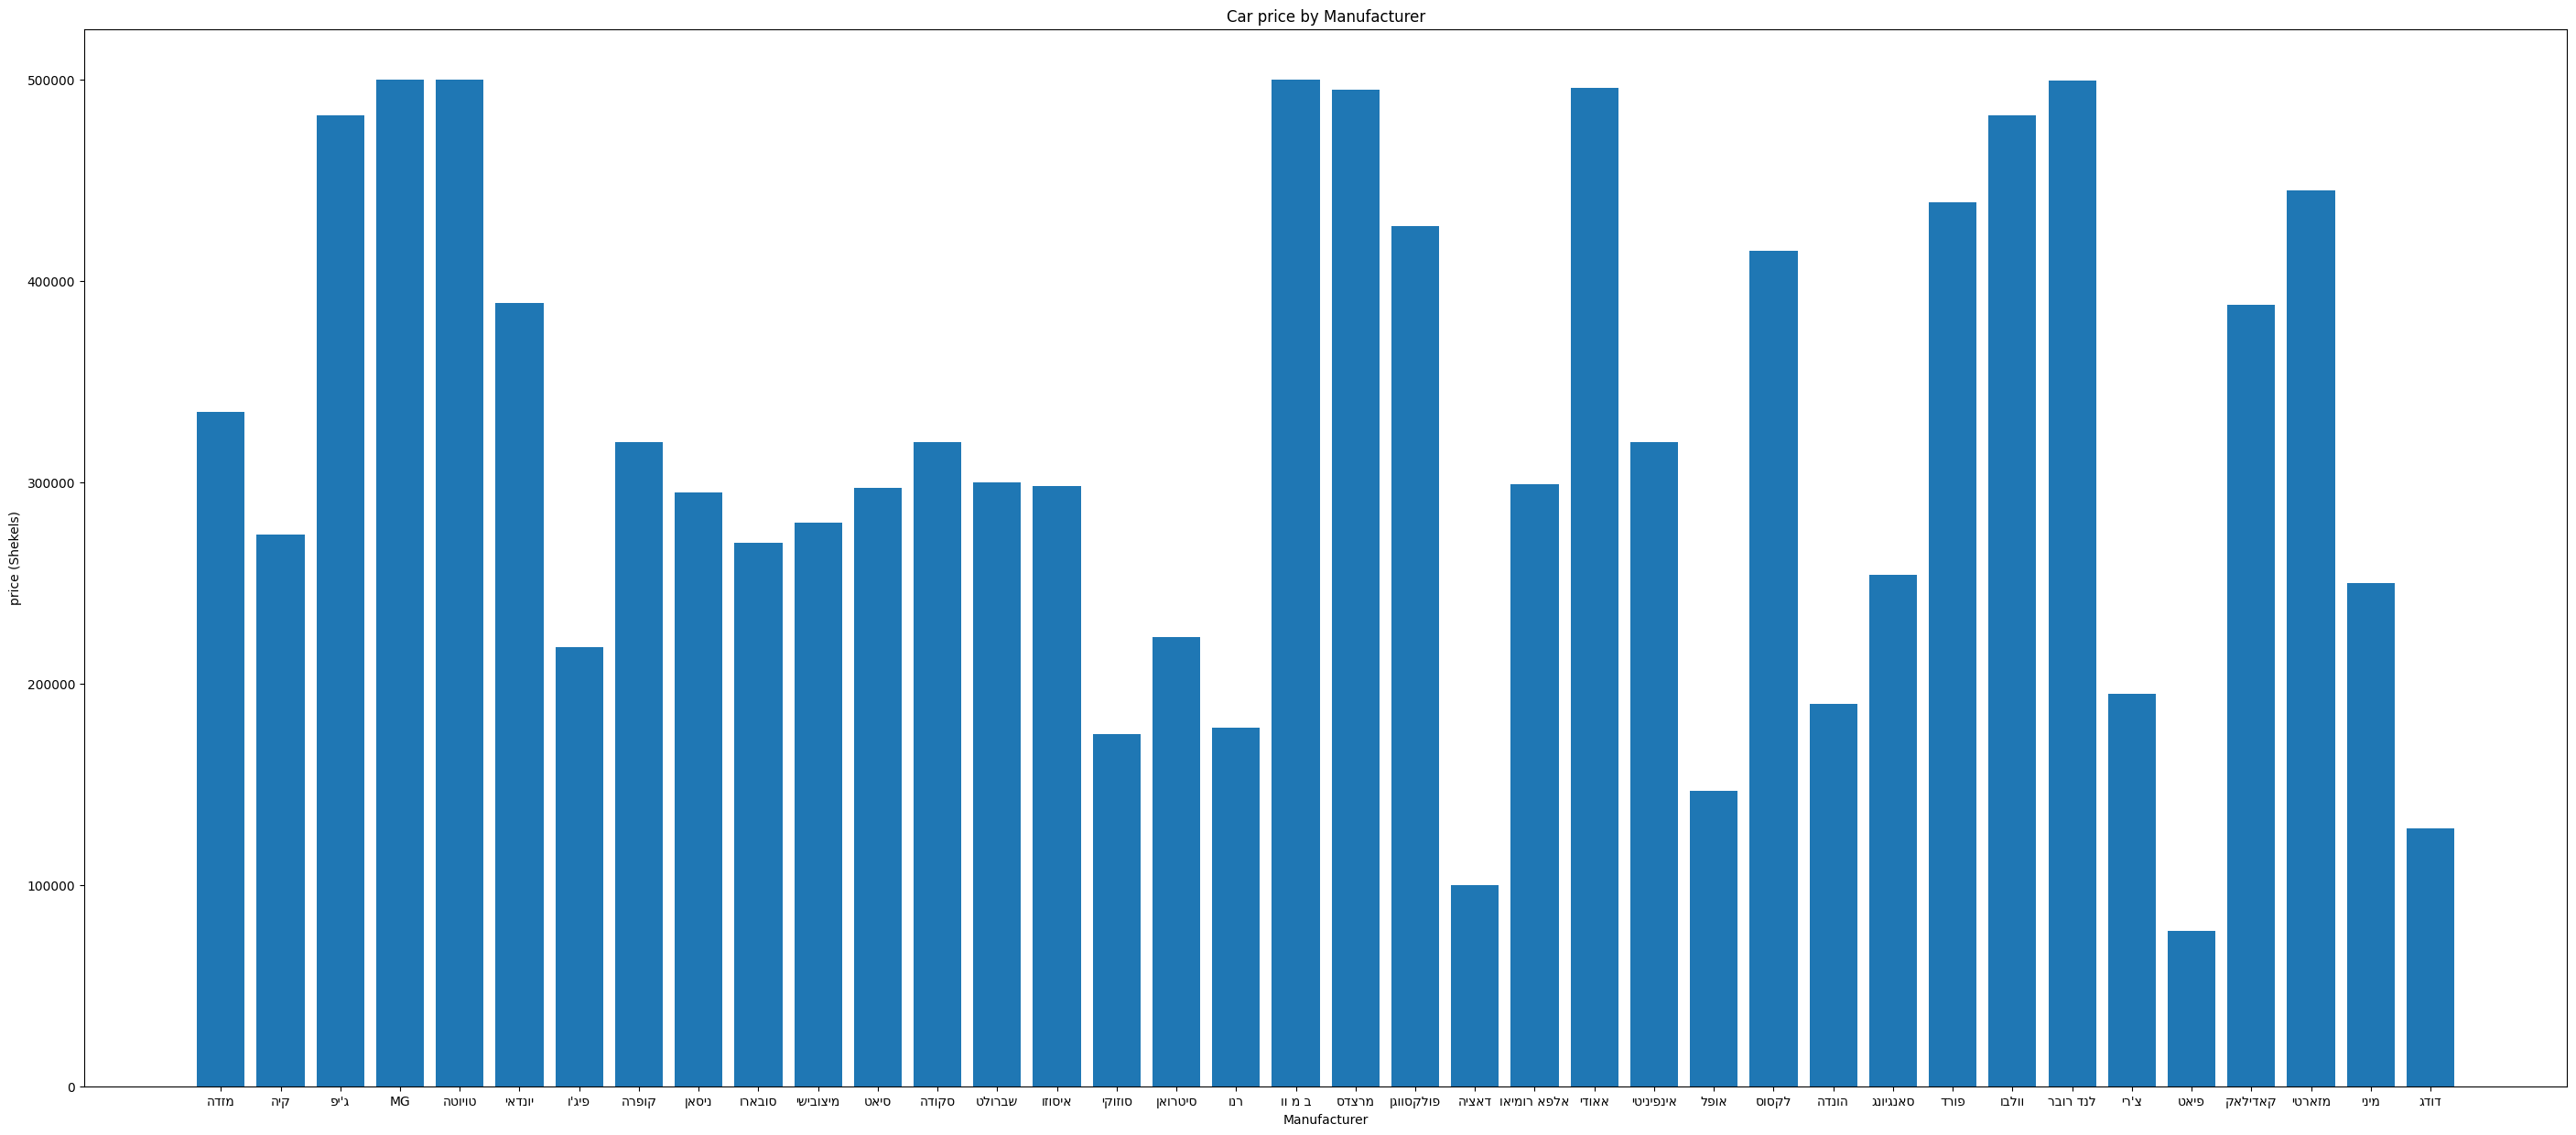

In [49]:
# Presentation of the price distribution by Manufacturer
plt.figure(figsize=(35, 15))

plt.bar(df['Manufacturer'], df['price'])
plt.xlabel('Manufacturer')
plt.ylabel('price (Shekels)')
plt.title('Car price by Manufacturer')

plt.show()

<Axes: >

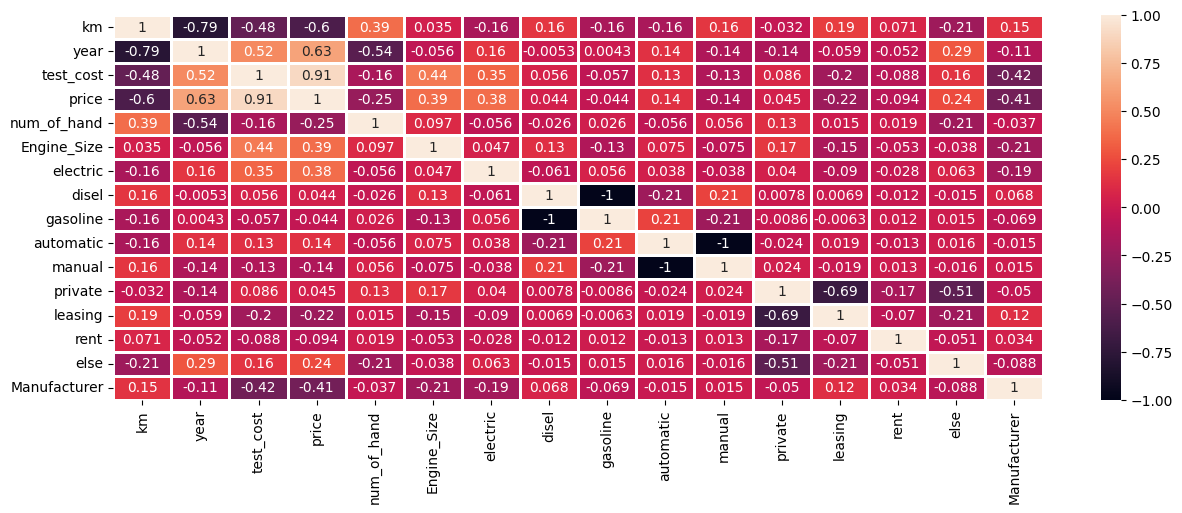

In [73]:
# Showing the relationship between all the characteristics
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(df.corr(), annot=True, linewidth=2, ax=ax)